Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 1**: Fit the Higgs mass - given a `fitter(xvalues, data, init)` function below, write a function `fitfunc(...)` that describes the combined background and signal model to fit the data. Create two pictures: 

**(a)** plot the data with cross markers ('+' symbol) and the best fit curve as red line on the first plot and 

**(b)** draw the residuals with cross markers on the second plot where residuals are defined as the difference between best fit model and pure background model, see below.

The fit function is composed of a background model with 3 parameters $$b(m)=A\,\exp{}\left( b_{1}\,(m - 105.5)+b_{2}\,(m-105.5)^{2}\right).$$ The signal is added to the background and its model is $$s(m) = \frac{R}{\sigma\sqrt{2\,\pi}}\,\exp{}\left(-\frac{(m-\mu{})^{2}}{2\sigma^{2}}\right),$$ featuring another 3 parameters for a total of six parameters to fit.

A set of 6 initial values for the fit are given. You could draw the data and the initial values, inserted into your function, on the same plot and convince yourself that these are close to the best in order to check your function.

The xvalues represent masses (in GeV units) of potential particles decaying into two photons in the ATLAS detector at CERN. Any peak would correspond to a real particle having decayed while a smooth background represents chance coincidences or simply noise. The peak to fit at a bit above 125 GeV led to the announcement of the discovery of the Higgs particle at CERN in 2012. The residuals plot subtracts the background model and let's the signal stand out very clearly. The data itself is read off a histogram (in counts) hence the xvalues really are bin centres at the mass values as indicated.

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def background(xvalues, A, b1, b2):
    """Take input values and constants and generate background noise.

    The equation used is 𝑏(𝑚)=𝐴exp(𝑏1(𝑚−105.5)+𝑏2(𝑚−105.5)^2).
    Parameters:
    -----------
    xvalues: np.ndarray of the masses of potential particles decaying
    into photons, bucketed into midpoints.

    A: float constant used in background model.

    b1: float constant used in background model.

    b2: float constant used in background model.
    Returns:
    --------
    background: np.ndarray - the xvalues transformed by the equation
    above.
    """
    return A * np.exp(b1 * (xvalues - 105.5) + b2 * (xvalues - 105.5) ** 2)


def signal(xvalues, R, sigma, mu):
    """Take the input values and constants and generate signal data.

    The equation used is 𝑠(𝑚)=𝑅/√(𝜎2𝜋) exp(−(𝑚−𝜇)^2/2𝜎^2).
    Parameters:
    -----------
    xvalues: np.ndarray of the masses of potential particles decaying
    into photons, bucketed into midpoints.

    R: float constant used in the signal formula.

    sigma: float constant used in the signal formula.

    mu: float constant used in the signal formula.
    Returns:
    --------
    signal: np.ndarray - the xvalues transformed by the above equation.
    """
    return (
        R
        / (sigma * (2 * np.pi) ** 0.5)
        * np.exp(-1 * (xvalues - mu) ** 2 / (2 * sigma ** 2))
    )


def fitfunc(xvalues, mu, sigma, R, A, b1, b2):
    """Take the input values and constants and
    return the function to be fitted.

    Parameters:
    -----------
    xvalues: np.ndarray of the masses of potential particles decaying
    into photons, bucketed into midpoints.

    mu: float constant used in the signal formula.
    Returns:

    sigma: float constant used in the signal formula.

    R: float constant used in the signal formula.

    A: float constant used in background model.

    b1: float constant used in background model.

    b2: float constant used in background model.
    Returns:
    --------
    fitfunc: np.ndarray sum of results of background and
    signal function calls.
    See also:
    ---------
    background

    signal
    """
    return background(xvalues, A, b1, b2) + signal(xvalues, R, sigma, mu)


def fitter(xval, yval, initial):
    """Find best fit for a given set of x and y data and initial data.
    Parameters:
    xval: np.ndarray the x values to use.

    yval: np.ndarray the y values to use.

    initial: tuple of constants to be used in fitfunc.
        Constants:
        0: mu
        1: sigma
        2: R
        3: A
        4: b1
        5: b2
    Returns:
    --------
    best: best_fit polynomial as according to curve_fit
    See also:
    ---------
    fitfunc
    """
    best, _ = curve_fit(fitfunc, xval, yval, p0=initial)
    return best

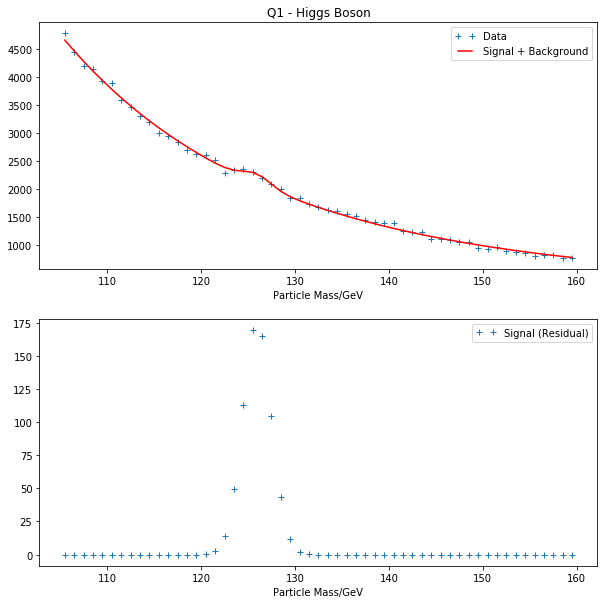

In [2]:
# start value parameter definitions, see equations for s(m) and b(m).
# init[0] = mu
# init[1] = sigma
# init[2] = R
# init[3] = A
# init[4] = b1
# init[5] = b2
init = (125.8, 1.4, 470.0, 5000.0, -0.04, -1.5e-4)
xvalues = np.arange(start=105.5, stop=160.5, step=1)
data = np.array(
    [
        4780,
        4440,
        4205,
        4150,
        3920,
        3890,
        3590,
        3460,
        3300,
        3200,
        3000,
        2950,
        2830,
        2700,
        2620,
        2610,
        2510,
        2280,
        2330,
        2345,
        2300,
        2190,
        2080,
        1990,
        1840,
        1830,
        1730,
        1680,
        1620,
        1600,
        1540,
        1505,
        1450,
        1410,
        1380,
        1380,
        1250,
        1230,
        1220,
        1110,
        1110,
        1080,
        1055,
        1050,
        940,
        920,
        950,
        880,
        870,
        850,
        800,
        820,
        810,
        770,
        760,
    ]
)
# create two subplots to fit both graphs on
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# first create the graph of the raw data
raw_line = ax1.plot(xvalues, data, "+", label="Data")
# use fitter to generate the curve of best fit and plot it
best_init = fitter(xvalues, data, init)
fitted_data = fitfunc(
    xvalues,
    best_init[0],
    best_init[1],
    best_init[2],
    best_init[3],
    best_init[4],
    best_init[5],
)
fit_line = ax1.plot(xvalues, fitted_data, "r", label="Signal + Background")
# add axis labels, legend, background colour
ax1.set_title("Q1 - Higgs Boson")
ax1.set_xlabel("Particle Mass/GeV")
ax2.set_xlabel("Particle Mass/GeV")
# ax1.set_ylabel("∑Events/GeV")
# ax2.set_ylabel("∑Events/GeV - background")
ax1.legend(numpoints=2)

# on the second subplot plot the residuals
residual = fitted_data - background(xvalues, best_init[3], best_init[4], best_init[5])
residual_line = ax2.plot(xvalues, residual, "+", label="Signal (Residual)")
ax2.legend(numpoints=2)
plt.show()

In [3]:
# Test cell
val = fitfunc(xvalues, init[0], init[1], init[2], init[3], init[4], init[5])
assert val[1] > 4800 and val[1] < 4805, "fitfunc wrong or initial values changed"

In [4]:
# Test cell
bf = fitter(xvalues, data, init)
assert bf[0] < 126.0 and bf[0] > 125.9, "bad fit"
assert bf[1] < 1.55 and bf[1] > 1.5, "bad fit"

### Tests - 3 marks; Style - 1 mark; Plots - 3 marks